In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import randn, randint, uniform, sample

# Pandas DataFrame and Series
Pandas memiliki 2 tipe koleksi data, yaitu DataFrame dan Series.
Series untuk menampung data sengan hanya 1 dimensi (1 kolom), sedangkan DataFrame digunakan untuk data dengan multi-dimensi (banyak kolom)

In [3]:
#perbedaan penggunaan DataFrame dan Series
#menggunakan 1000 data random untuk 1000 hari/tanggal dari 1 Januari 2020
df = pd.DataFrame(randn(1000), pd.date_range('2020-01-01', periods=1000))
ts = pd.Series(randn(1000), pd.date_range('2020-01-01', periods=1000))

In [4]:
df.head()

,0
2020-01-01,-0.214057
2020-01-02,-0.497088
2020-01-03,-0.313759
2020-01-04,-2.492081
2020-01-05,1.189236


In [5]:
ts.head()

2020-01-01   -0.390483
2020-01-02    1.273385
2020-01-03   -0.015669
2020-01-04    0.132694
2020-01-05   -1.514686
Freq: D, dtype: float64

Terlihat mirip, namun jika diperhatikan, DataFrame mengemas datanya sebagai bentuk tabular (tabel) dengan kolom pertama (yg berisi tanggal) sebagai indeks.
Sementara pada Series, meski Tanggal sama2 sebagai indeks, namun data berikutnya tidak ditempatkan dalam kolom melainkan nilai dari indeks tersebut.

In [9]:
#memberi nama kolom pada DataFrame
df = pd.DataFrame(randn(1000), pd.date_range('2020-01-01', periods=1000), columns =['Value'])
df.head()


,Value
2020-01-01,-1.512913
2020-01-02,1.052945
2020-01-03,-0.055804
2020-01-04,0.663894
2020-01-05,-0.464488


In [10]:
#mari kita ubah nilai tiap baris dari Value sebagai penjumlahan dari baris seblumnya
df['Value'] = df['Value'].cumsum()


In [11]:
df.head()

,Value
2020-01-01,-1.512913
2020-01-02,-0.459967
2020-01-03,-0.515772
2020-01-04,0.148122
2020-01-05,-0.316366


In [12]:
ts = ts.cumsum()
ts.head()

2020-01-01   -0.390483
2020-01-02    0.882902
2020-01-03    0.867233
2020-01-04    0.999928
2020-01-05   -0.514758
Freq: D, dtype: float64

# Data Visualization with DataFrame and Series
## Line Plot

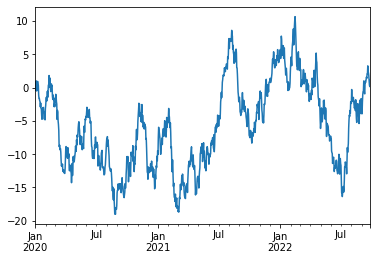

In [13]:
ts.plot()

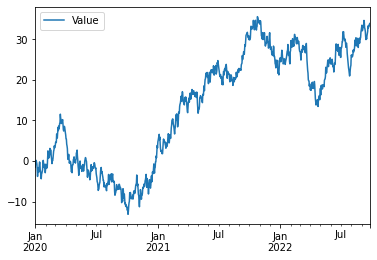

In [14]:
df.plot()

In [19]:
#Plotting multidimensional data, Contoh: Iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


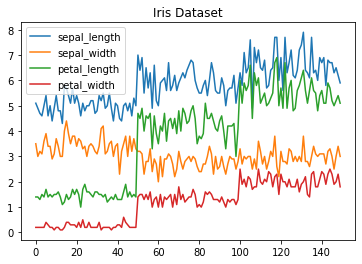

In [21]:
#Line plot dengan title
iris.plot(title='Iris Dataset')

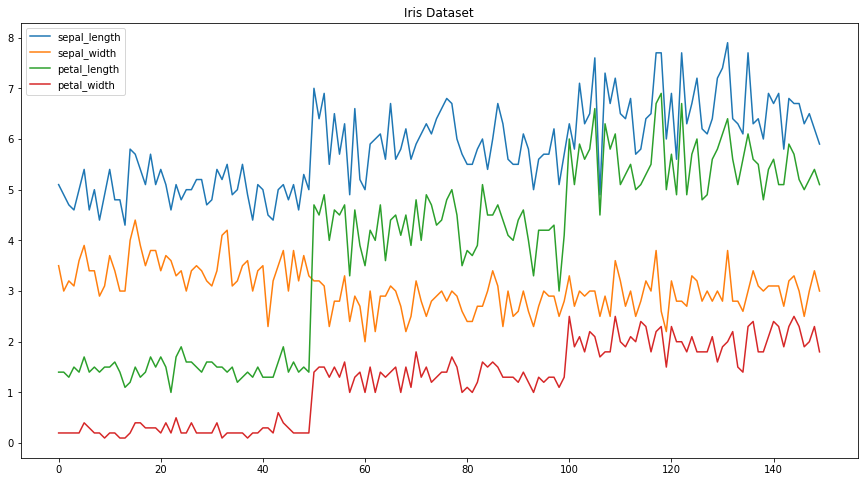

In [22]:
#mengubah ukuran gambar
iris.plot(title='Iris Dataset', figsize=(15,8))

Text(0, 0.5, 'Y Axis')

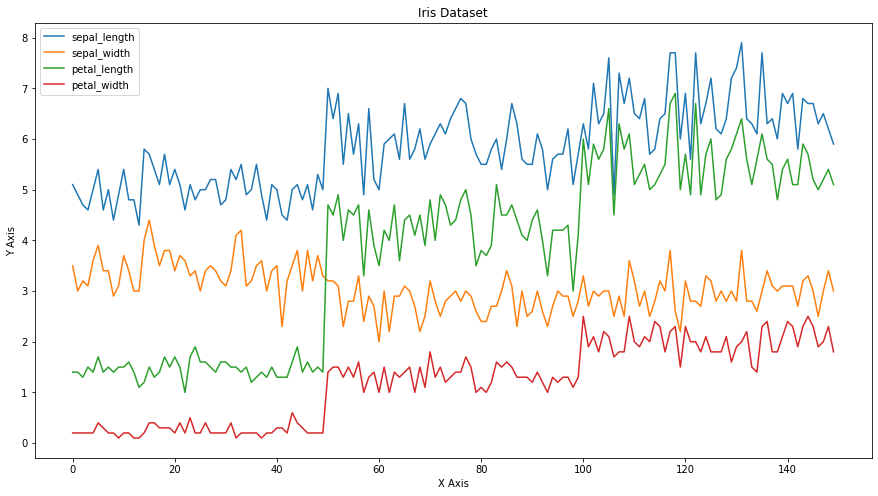

In [25]:
#memberi label x dan ye
ax = iris.plot(title='Iris Dataset', figsize=(15,8))
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

## Bar *Plot*
Bar plot atau bar chart digunakan untuk merepresentasikan data kategorikal

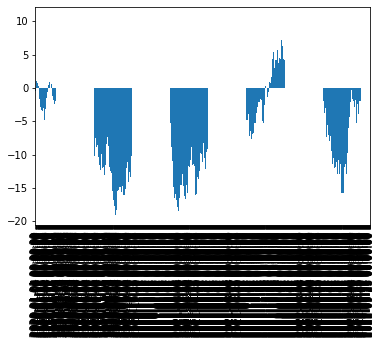

In [26]:
ts.plot(kind='bar')

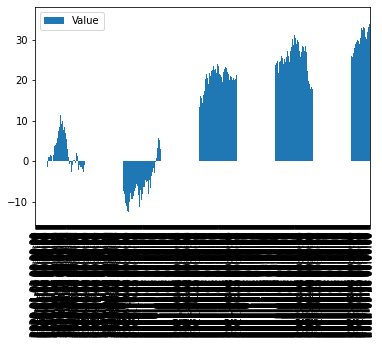

In [42]:
df.plot(kind='bar')

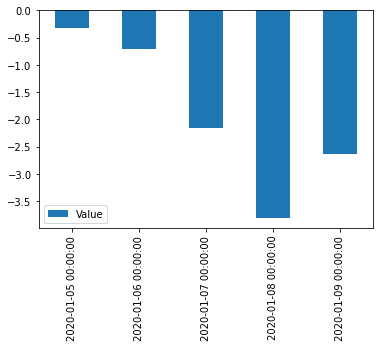

In [40]:
#kita bisa memplot data kontinyu seperti df ke bar chart dengan mengambil baris tertentu
df.iloc[4:9].plot(kind='bar')

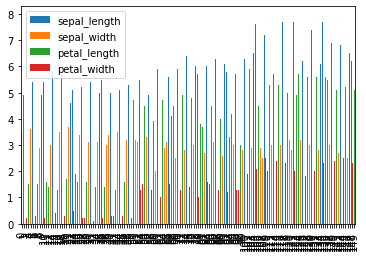

In [46]:
iris.plot(kind='bar')

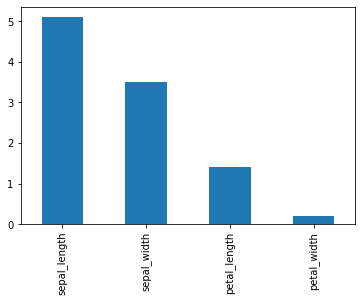

In [45]:
no_spec = iris.drop(['species'], axis=1)
no_spec.iloc[0].plot(kind='bar')

Beberapa atribut dari bar chartb

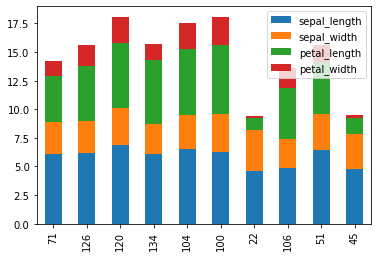

In [55]:
#Menumpuk (staked) bar
ct = iris.sample(10)
ct.plot.bar(stacked=True)

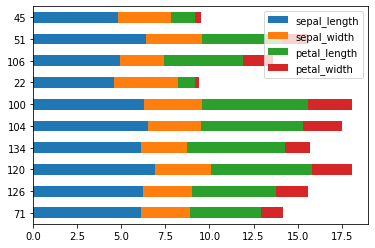

In [56]:
#Mengubah Vertikal menjadi horisontal
ct.plot(kind='barh', stacked=True)

## Hostogram
Data kontinyu seperti pada ts atau df lebih cocok diplot dengan histogram

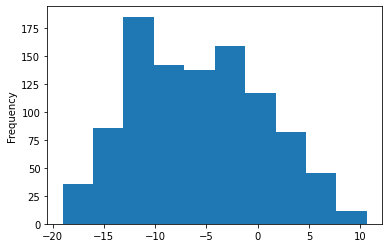

In [31]:
ts.plot(kind='hist')

In [49]:
#mari coba plot dataset titanic
ttc = sns.load_dataset('titanic')
ttc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


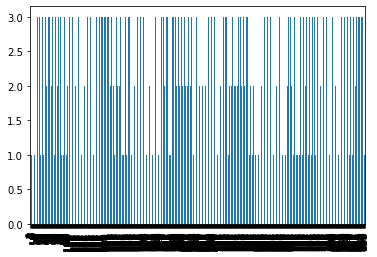

In [50]:
#jika kolom pclass diplot dengan bar, maka akan ditampilkan bar sejumlah baris data
ttc['pclass'].plot(kind='bar')

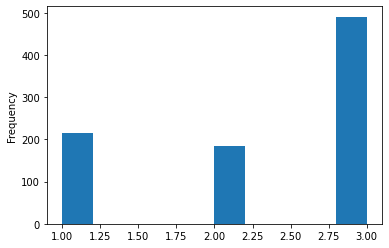

In [52]:
#namun histogram akan menggroup-kan data dan menampilkan frekuensi per groupnya
ttc['pclass'].plot(kind='hist')

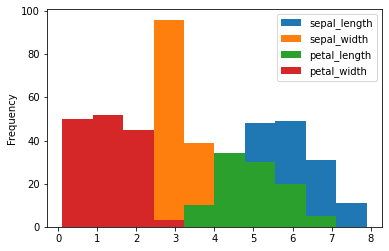

In [57]:
iris.plot.hist()

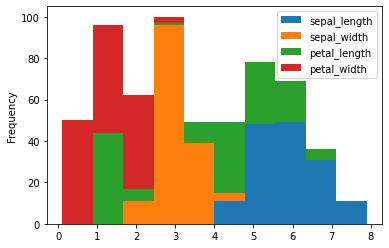

In [58]:
#Menumpuk histogram
iris.plot.hist(stacked=True)

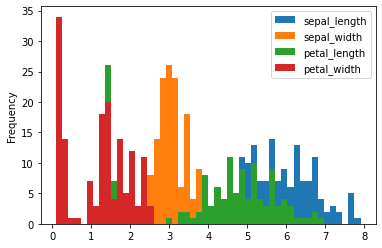

In [64]:
#mengubah ukuran bin/lebar pengelompokkan
iris.plot.hist(bins=50)

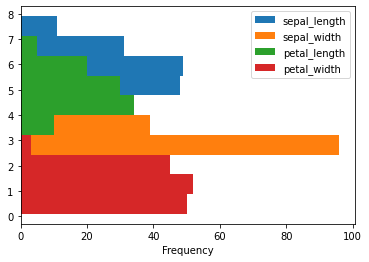

In [65]:
#mengubah menjadi horisonta
iris.plot.hist(orientation='horizontal')

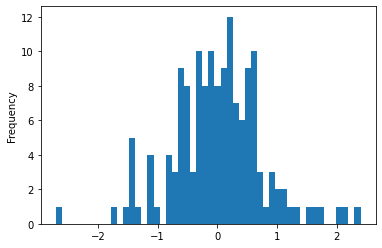

In [67]:
#memplot perbedaan nilai antar data. Misal beda nilai sepal length dari daa iris
iris['sepal_length'].diff().plot.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa63089f890>,
      dtype=object)

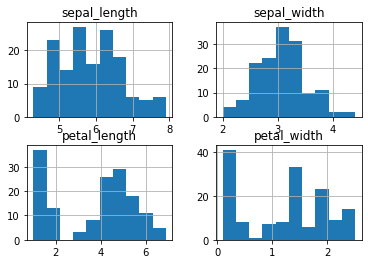

In [71]:
#menampilkan histogram per kolom
iris.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6306e08d0>,
      dtype=object)

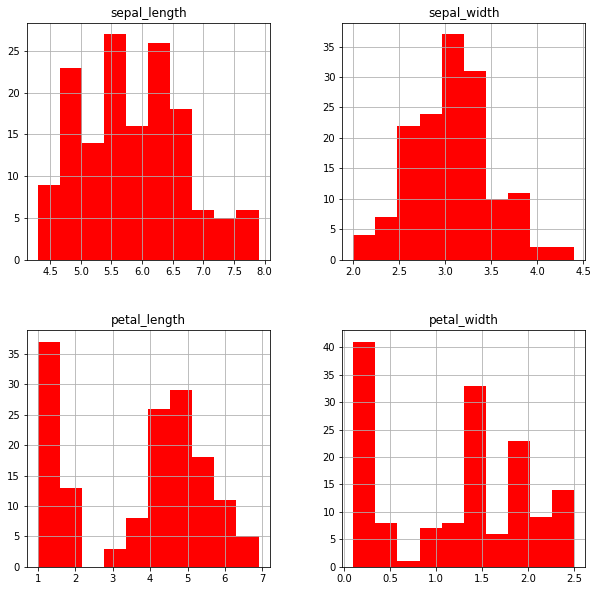

In [73]:
iris.hist(color = 'r', figsize=(10,10))

## Box Plot
Box plot digunakan untuk melihat distribusi nilai dan juga membandingkan antar group data

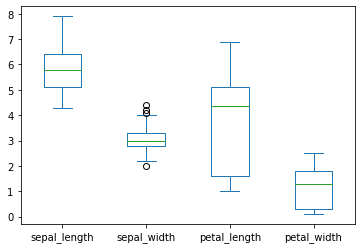

In [74]:
iris.plot(kind='box')

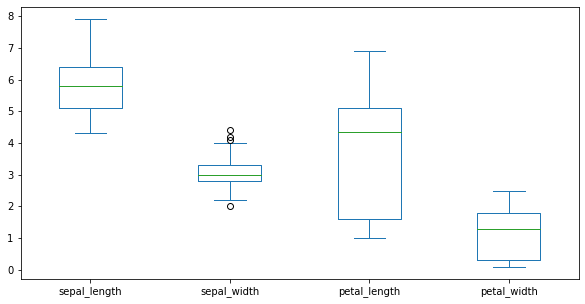

In [78]:
iris.plot.box(figsize=(10,5))

garis di dalam box adalah median, batas atas box adalah 1st quarter, sememntara batas bawah box adalah 2nd quarter. garis atas adalah nilai maximum dan garis bawah adalah nilai minimum

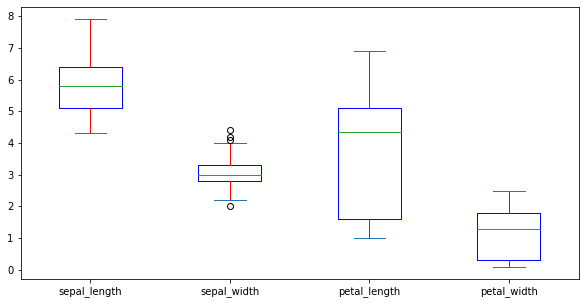

In [81]:
#mewarnai box plot
#buat color dictionary
warna = {'boxes': 'b', 'whiskers' : 'r'}

iris.plot(kind='box', figsize=(10,5),color=warna)

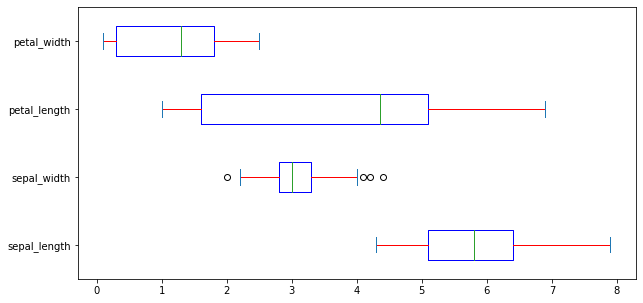

In [82]:
#dirotasi jadi horisontal
iris.plot(kind='box', figsize=(10,5),color=warna,vert=False)

## Area Plot


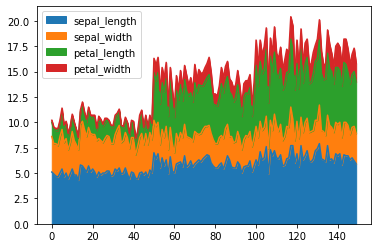

In [83]:
iris.plot.area()

## Scatter Plot
Scatter Plot digunakan untuk melihat korelasi antar data (dalam hal ini 2 atribut)

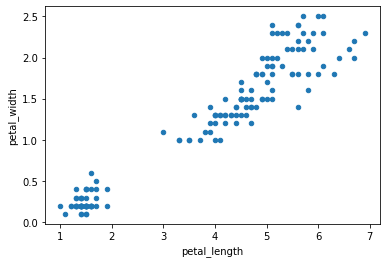

In [84]:
#melihat korelasi antara petal lenght dan petal width
iris.plot.scatter(x='petal_length', y='petal_width')

Terlihat bahwa titik2 pada scatter plot membentuk sebuah garis, yang menandakan adanya korelasi antara petal widht dan petal lenght

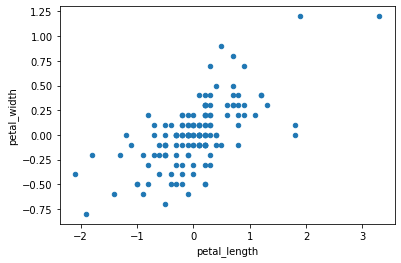

In [85]:
iris_diff = no_spec.diff()
iris_diff.plot.scatter(x='petal_length', y='petal_width')

Terlihat titik2 membnetuk kumpulan yang menandakan hubungan antara perbedaan petal length dan petal width masih terdapat relasi namun tidak linear

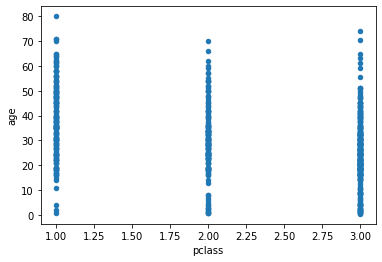

In [89]:
ttc.plot.scatter(x='pclass', y='age')

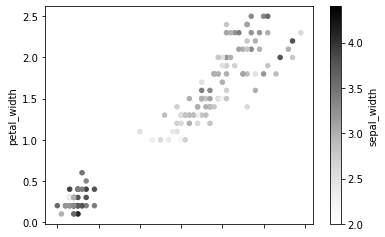

In [90]:
#membandingkan 3 atribut
iris.plot.scatter(x='petal_length', y='petal_width', c='sepal_width')


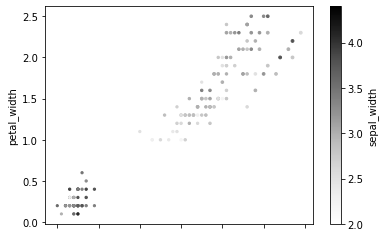

In [99]:
#membandingkan korelasi 4 atribut dengan mengatur besar titik
iris.plot.scatter(x='petal_length', y='petal_width', c='sepal_width', s= 'sepal_length')

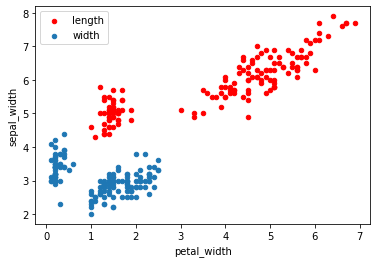

In [92]:
#Menumpul dua scatter plot
ax = iris.plot.scatter(x='petal_length', y='sepal_length', label='length', color='r')
iris.plot.scatter(x='petal_width', y='sepal_width',label ='width', ax=ax)

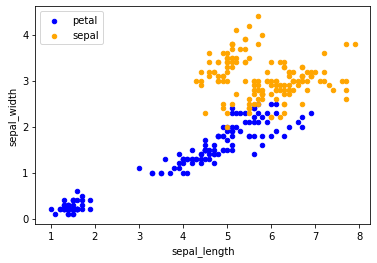

In [93]:
ax = iris.plot.scatter(x='petal_length', y='petal_width', label='petal', color='b')
iris.plot.scatter(x='sepal_length', y='sepal_width',label ='sepal', color='Orange',ax=ax)

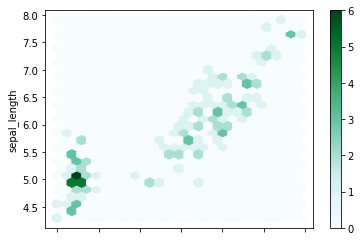

In [101]:
iris.plot.hexbin(x='petal_length', y='sepal_length', gridsize=25)

## Pie Plot
Pie plot digunakan untuk melihat persentase data dibandingkan data secara keseluruhan

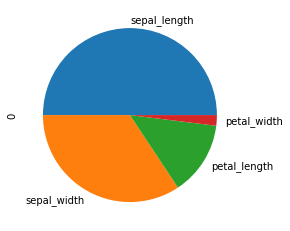

In [105]:
d = no_spec.iloc[0]
d.plot.pie()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa62f173f50>,
      dtype=object)

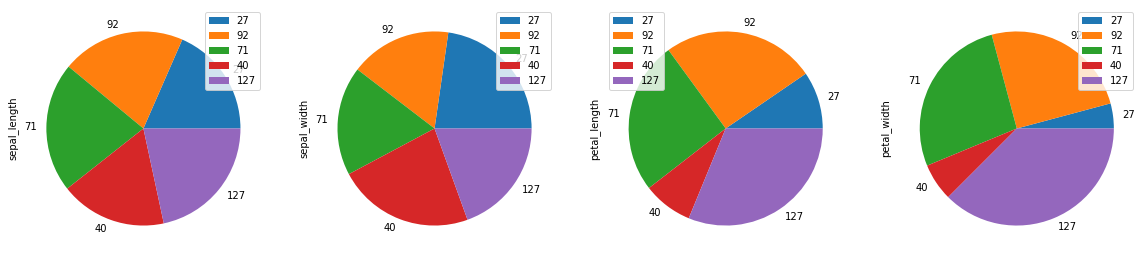

In [108]:
#misal kita ambil 5 baris random dari iris dan diplot per atributnya
samp = no_spec.sample(5)
samp.plot.pie(subplots=True, figsize=(20,20))

In [111]:
d = samp.T
d

,27,92,71,40,127
sepal_length,5.2,5.8,6.1,5.0,6.1
sepal_width,3.5,2.6,2.8,3.5,3.0
petal_length,1.5,4.0,4.0,1.3,4.9
petal_width,0.2,1.2,1.3,0.3,1.8


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa62efb7850>,
      dtype=object)

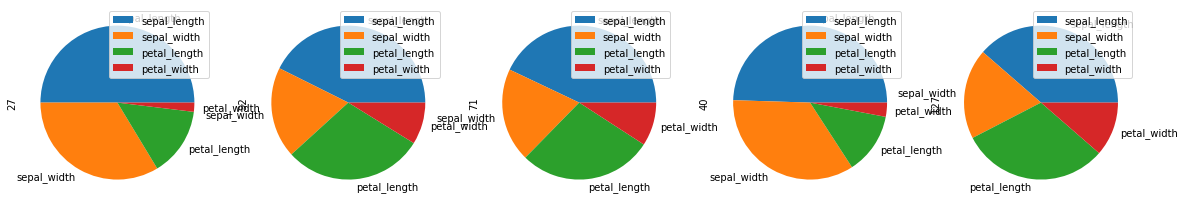

In [112]:
d.plot.pie(subplots=True, figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa62edf2f10>,
      dtype=object)

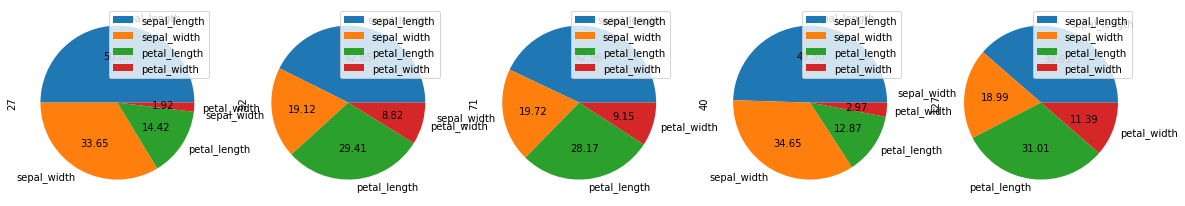

In [113]:
#Menampilkan nilai persentase
d.plot.pie(subplots=True, figsize=(20,20), autopct='%.2f')

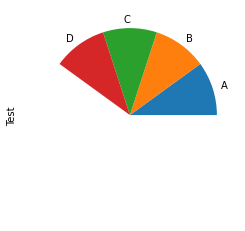

In [114]:
#Pie plot tidak selalu harus bulat

series = pd.Series([0.1]*4, index = ['A','B','C','D'], name = 'Test')
series.plot.pie()

## Scatter Matrix Plot


In [115]:
from pandas.plotting import scatter_matrix

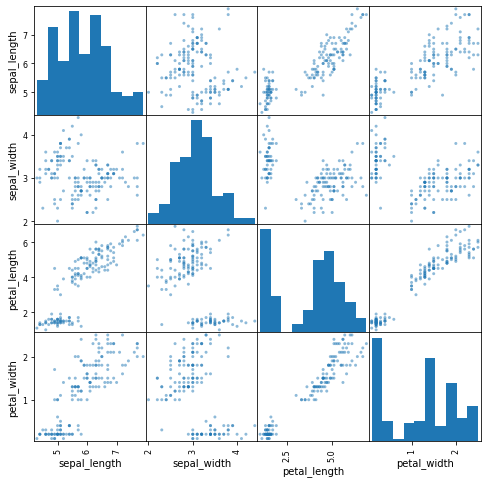

In [117]:
scatter_matrix(no_spec, figsize=(8,8))
plt.show()

by default akan menampilkan histogram untuk diagonal matriknya

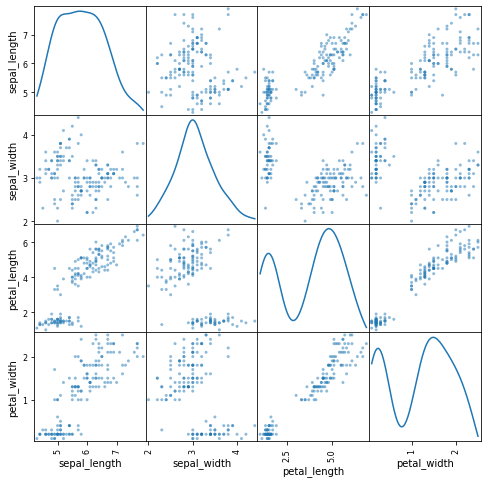

In [118]:
scatter_matrix(no_spec, figsize=(8,8), diagonal = 'kde')
plt.show()

## Othe Plots

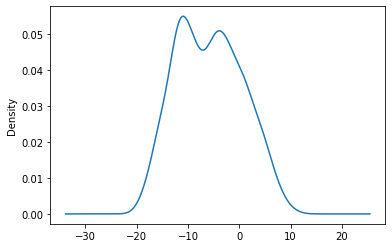

In [119]:
#lde
ts.plot.kde()

In [123]:
#Andrews Curves
from pandas.plotting import andrews_curves

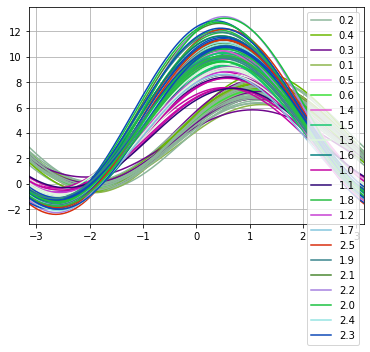

In [126]:
andrews_curves(no_spec,'petal_width')